# Hierarchical Clustering UseCase and Gaussian Mixture Models

## Content

Case Study: Customer Grouping with DBSCAN

Case Study: Building Stock Portfolios with Hierarchical Clustering

Gaussian Mixture Models (GMMs)

- Introduction and Intuition

- GMM with Multiple Features

- Mathematical Formulation of Gaussian Distribution

- Multi-Dimensional Multi-Modal Gaussian Distributions (Mixture Models)

- Finding K-Gaussians

***

## Case Study: Customer Grouping with DBSCAN

- The beauty of using DBSCAN is that it can separate outliers (noise points) as well as it can perform clustering (core and border points).

- In this case study, we'll see an example of how DBSCAN can perform clustering in the presense of outliers in data.

#### **How do we do Customer Grouping (Segmentation) if our customers are arbitrarily distributed with outliers in the data?**

- That is, some customers (data points) act as outliers in the data.

- In order to understand this, we'll use a Wholesale Customer Data.



### **Dataset - Wholesale Customers Data**

The dataset used for this case study contains the following parameters:

1. **Fresh:** annual spending (some monetary unit) on fresh products (Continuous);
2. **Milk:** annual spending (some monetary unit) on milk products (Continuous);
3. **Grocery:** annual spending (some monetary unit) on grocery products (Continuous);
4. **Frozen:** annual spending (some m.u.) on frozen products (Continuous)
5. **Detergentss_Paper:** annual spending (some m.u.) on detergents and paper products (Continuous)
6. **Delicassen:** annual spending (some m.u.) on and delicatessen products (Continuous);
7. **Channel:** customers Channel - (Two possible values: Horeca (Hotel/Restaurant/Cafe) or Retail channel) (Nominal)
8. **Region:** customers Region (Three possible values: Lisnon, Oporto or Other) (Nominal)

In [ ]:
id = "1dr93lHQUchIii1lwsGoS40VcUj-rW4H1"
print("https://drive.google.com/uc?export=download&id=" + id)

https://drive.google.com/uc?export=download&id=1dr93lHQUchIii1lwsGoS40VcUj-rW4H1


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1dr93lHQUchIii1lwsGoS40VcUj-rW4H1" -O wholesaledata.csv

--2022-08-08 04:49:48--  https://drive.google.com/uc?export=download&id=1dr93lHQUchIii1lwsGoS40VcUj-rW4H1
Resolving drive.google.com (drive.google.com)... 142.250.141.138, 142.250.141.113, 142.250.141.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/brtc8clcc0i6683ac3uupfqgcsgfsol3/1659934125000/10804243441129704195/*/1dr93lHQUchIii1lwsGoS40VcUj-rW4H1?e=download&uuid=8aa80eb3-2683-47e7-bfc2-0900443ffdde [following]
--2022-08-08 04:49:48--  https://doc-04-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/brtc8clcc0i6683ac3uupfqgcsgfsol3/1659934125000/10804243441129704195/*/1dr93lHQUchIii1lwsGoS40VcUj-rW4H1?e=download&uuid=8aa80eb3-2683-47e7-bfc2-0900443ffdde
Resolving doc-04-ag-docs.googleusercontent.com (doc-04-ag-docs.googleusercontent.com)... 142.250.141.132, 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./wholesaledata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- The dataset consists of 440 customers and has 8 attributes for each of these customers.

- No missing values

- Only two variables are **non-continuous (categorical)** in nature: Channel and Region.

- So for easing our computations, we will drop these two categorical features.

In [ ]:
# Dropping categorical variables for simplicity
df.drop(["Channel", "Region"], axis = 1, inplace = True)

### **Visualizing the data in 2D**

Using 2 features:

1. **Grocery:** The customer’s annual spending (in some monetary unit) on grocery products.
2. **Milk:** The customer’s annual spending (in some monetary unit) on milk products.

#### Let's plot two features data now:

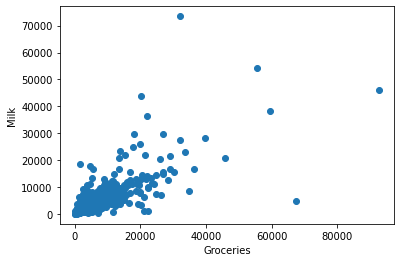

In [ ]:
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

- We can easily see the data points that are far away from rest of the data points.
- Well, those are our **outlier** data points.

#### **Question: Why don't we just use K-Means here?**

- **K-Means is sensitive to outliers** and will try to cluster the outliers as well.


#### **So which clustering algorithm is robust with outliers and can help us identify the same?**

- DBSCAN

#### **Remember?**
- DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”.
- The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

### **Important Hyperparameters in DBSCAN**
As a reminder:

- **Eps:** It specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (Eps), these points are considered neighbours.

- **minPoints:** It's the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

<img src='https://drive.google.com/uc?id=18t4IZDJcASfzTre6Uejw2K5rKno8nXA6'>


### **DBSCAN Algorithm**
As a reminder, DBSCAN Algorithm has following steps:

1. For each point, the algorithm counts how many points are located within a small distance **Eps** (epsilon) from it. This region is called the points epsilon-neighborhood.

2. If an point has at least **minPts** points in its neighborhood (including itself), then it is considered as a **core point**. In other words, core points are those that are located in dense regions.

3. All points in the neighborhood of a core point belong to the same cluster. This neighborhood may include other core points and **border points**; therefore, a long sequence of neighboring points forms a single cluster.

4. Noise: Any point that is not a core point and does not have one in its neighborhood is considered a **noise point** (anomaly).


### **Goal**
- For our case, with DBSCAN, we want to identify this main cluster of customers.
- But we also want to flag customers with more unusual annual purchasing habits as outliers.

### **Scaling the Features**

- Because the values of the data are in the thousands, we are going to normalize each attribute by scaling it to 0 mean and unit variance.
- This helps to keep the inter-relationships between the features intact so that a small change in one feature would reflect in the other.

In [ ]:
df = df[['Grocery', 'Milk']]
std_scaler = StandardScaler().fit(df)
std_df = std_scaler.transform(df)

In [ ]:
std_df

array([[-4.11148934e-02,  5.23567773e-01],
       [ 1.70318354e-01,  5.44457667e-01],
       [-2.81571010e-02,  4.08537706e-01],
       [-3.92976899e-01, -6.24019925e-01],
       [-7.93561833e-02, -5.23964546e-02],
       [-2.97637045e-01,  3.34066589e-01],
       [-1.02848766e-01, -3.52315651e-01],
       [ 1.55358951e-01, -1.13980948e-01],
       [-1.85336177e-01, -2.91409401e-01],
       [ 1.15142340e+00,  7.18494904e-01],
       [ 5.29133322e-01, -5.33459952e-02],
       [-3.61161832e-01, -6.33786629e-01],
       [ 4.00924920e-01,  8.84800166e-01],
       [ 7.40671917e-01,  5.58511794e-02],
       [ 4.36111121e-01,  4.97658878e-01],
       [-4.35116062e-01, -6.35143116e-01],
       [ 4.39271558e-01,  4.09622895e-01],
       [-5.28665002e-01,  4.89330975e-02],
       [ 2.26258092e-01,  7.19933704e-02],
       [ 1.59362172e-01, -4.47812310e-01],
       [-3.52839347e-01, -1.73259414e-01],
       [-6.25901120e-01, -6.68105741e-01],
       [-3.66850619e-01, -5.26217238e-01],
       [ 1.

### **Fit and Transform using DBSCAN**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(std_df)

In [ ]:
#"Noisy samples are given the label -1." --> Reference
labels = dbsc.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
out_df = df.copy()
out_df['label'] = dbsc.labels_

In [ ]:
out_df['label'].value_counts()

 0    404
-1     36
Name: label, dtype: int64

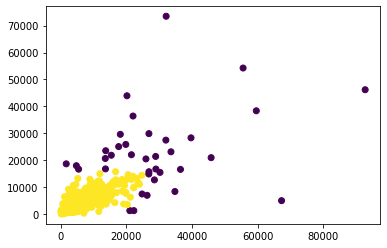

In [ ]:
plt.scatter(out_df['Grocery'], out_df['Milk'], c=out_df['label'])

#### **What insights can we draw from here?**
- DBSCAN formed only 1 cluster.
- Outliers are easily detected using DBSCAN.
- Most of the customers share the same behaviour (404 out of 440).

### **K-Means**

#### **Let's try out K-Means on the same dataset now and compare the results of K-Means and DBSCAN**

In [ ]:
from sklearn.cluster import KMeans

k = 2 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(std_df)

In [ ]:
clusters = df.copy()
clusters['label'] = kmeans.labels_
clusters

,Grocery,Milk,label
0,7561,9656,1
1,9568,9810,1
2,7684,8808,1
3,4221,1196,1
4,7198,5410,1
...,...,...,...
435,16027,12051,1
436,764,1431,1
437,30243,15488,0
438,2232,1981,1


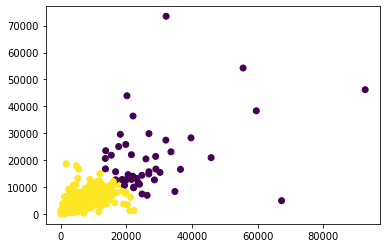

In [ ]:
plt.scatter(clusters['Grocery'], clusters['Milk'], c=clusters['label'])

- As we can see, **K-Means formed 2 clusters with all the outliers included in one of the clusters.** Finding outliers or noise with K-Means is generally not possible because every point is grouped into a cluster.

- Whereas, **DBSCAN identified and separated out the outlier points**.

***

## Case Study: Building Stock Portfolios with Hierarchical Clustering

#### **How can we build our own metric-driven stock portfolios (small cases)?**

**Goal :** Creating pools of stocks that move together(similar characteristics) on one or more fundamental financial metric.



#### **How can we enhance our portfolio allocation by leveraging some Data Science techniques?**

### **Dataset - Top 50 NSE stocks**

- Contains company's stock symbol
- Name, Industry and other details

In [ ]:
  import pandas as pd
  import numpy as np
  from matplotlib import pyplot as plt
  import seaborn as sns
  from sklearn.cluster import KMeans

In [ ]:
id = "1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb"
print("https://drive.google.com/uc?export=download&id=" + id)

https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb" -O ind_nifty50list.csv

--2022-06-15 18:18:13--  https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb
Resolving drive.google.com (drive.google.com)... 74.125.141.113, 74.125.141.101, 74.125.141.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/om5f7hgbm82ieknkkh4crr9ne9qr4m6n/1655317050000/10306167880925931714/*/1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb?e=download [following]
--2022-06-15 18:18:14--  https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/om5f7hgbm82ieknkkh4crr9ne9qr4m6n/1655317050000/10306167880925931714/*/1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb?e=download
Resolving doc-08-64-docs.googleusercontent.com (doc-08-64-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-08-64-docs.googleusercontent.com (doc-08-64-doc

In [ ]:
stocks_df = pd.read_csv("./ind_nifty50list.csv")
list_of_symobols = list(stocks_df['Symbol'])
stocks_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


### **Downloading the financials of these stocks**

In [ ]:
!pip install yfinance  # This is an old library that allows us to gather stocks data (how the stock is performing, etc.) from Yahoo Finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install fix-yahoo-finance  # Since yfinance is an old library, it also has some glitches, so we install this library as a fix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **Now, we'll take symbols from original dataset**
- We'll add `.NS` at the end of every symbol to fetch data from Yahoo Finance based on company's symbol.

In [ ]:
yf_symbols = list(map(lambda x: x + '.NS', list_of_symobols))
yf_symbols

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

#### **Now, we'll define some variables and fetch the corresponding data from Yahoo Finance for the companies in our list**

In [ ]:
import yfinance as yf


stock_financials = {
    'marketCap': [],
    'regularMarketVolume': [],
    'earningsQuarterlyGrowth': [],
    'bookValue': [],
    'totalRevenue': [],
    'returnOnAssets': [],
    'profitMargins': [],
    'earningsGrowth': []
    }

for ticker in yf_symbols:
    stock_info = yf.Ticker(ticker).info
    stock_financials['marketCap'].append(stock_info['marketCap'])
    stock_financials['regularMarketVolume'].append(stock_info['regularMarketVolume'])
    stock_financials['earningsQuarterlyGrowth'].append(stock_info['earningsQuarterlyGrowth'])
    stock_financials['bookValue'].append(stock_info['bookValue'])
    stock_financials['totalRevenue'].append(stock_info['totalRevenue'])
    stock_financials['returnOnAssets'].append(stock_info['returnOnAssets'])
    stock_financials['profitMargins'].append(stock_info['profitMargins'])
    stock_financials['earningsGrowth'].append(stock_info['earningsGrowth'])

In [ ]:
df = pd.DataFrame(stock_financials)
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth
0,NaN,2447029,-0.205,181.165,1.593403e+11,0.05149,0.29673,-0.235
1,2.551976e+12,928738,-0.002,143.991,2.894301e+11,0.11496,0.10471,-0.002
2,1.997887e+12,4638071,0.502,385.482,4.375369e+11,0.01288,0.32270,0.498
3,1.070175e+12,753785,-0.016,933.884,3.435395e+11,0.11259,0.17948,-0.015
4,3.311923e+12,1659527,0.797,647.277,1.708877e+11,0.03660,0.41128,0.793


In [ ]:
  df.shape

(50, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marketCap                49 non-null     float64
 1   regularMarketVolume      50 non-null     int64  
 2   earningsQuarterlyGrowth  48 non-null     float64
 3   bookValue                49 non-null     float64
 4   totalRevenue             49 non-null     float64
 5   returnOnAssets           22 non-null     float64
 6   profitMargins            50 non-null     float64
 7   earningsGrowth           48 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 3.2 KB


#### **Downloading stock price data**

In [ ]:
import yfinance as yf

stock_prices = yf.download(yf_symbols, start='2020-01-01')['Adj Close']
stock_prices.columns = list_of_symobols

[*********************100%***********************]  50 of 50 completed


In [ ]:
stock_prices.shape

(612, 50)

In [ ]:
stock_prices.tail()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,373.521973,1760.709961,748.700012,2913.946289,9370.917969,4214.786133,451.707916,401.235748,2883.702637,472.062775,...,422.185242,317.077698,184.449997,423.121002,2100.150635,705.708923,1143.308838,4032.545898,574.207214,243.721527
2020-01-02,378.961853,1758.206299,756.950012,2887.027588,9497.965820,4229.478516,453.601257,397.889709,2896.747314,469.682098,...,422.817139,316.588165,193.750000,438.589447,2090.509521,709.366699,1144.150391,4210.910156,581.235352,244.311890
2020-01-03,378.318970,1719.667480,742.950012,2841.747314,9338.342773,4177.084473,453.501617,394.584534,2882.896729,466.160767,...,432.197968,311.545868,191.100006,437.549194,2132.171631,717.747009,1128.407837,4185.515137,576.647522,247.066940
2020-01-06,376.044098,1676.219116,723.250000,2809.926270,9035.437500,3981.102051,448.070740,382.873474,2867.005859,462.986542,...,427.677673,305.573456,185.649994,428.096222,2131.977783,713.394836,1147.120728,4123.910645,570.986023,248.100052
2020-01-07,380.593811,1693.156616,725.750000,2810.203613,9088.344727,3992.009277,443.536713,376.222290,2880.809326,464.821625,...,433.947723,308.314880,184.699997,430.674316,2137.209717,719.599060,1148.457275,4208.231934,580.844849,251.101059


In [ ]:
# splitting data by year - 2020 returns
price_2020 = stock_prices.loc["2020-01-02 00:00:00":"2020-12-31 00:00:00"]
stock_prices.loc['returns_2020'] = (price_2020.loc['2020-07-01 00:00:00'] / price_2020.loc['2020-01-02 00:00:00'] - 1)*100

stock_prices

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,373.521973,1760.709961,748.700012,2913.946289,9370.917969,4214.786133,451.707916,401.235748,2883.702637,472.062775,...,422.185242,317.077698,184.449997,423.121002,2100.150635,705.708923,1143.308838,4032.545898,574.207214,243.721527
2020-01-02 00:00:00,378.961853,1758.206299,756.950012,2887.027588,9497.965820,4229.478516,453.601257,397.889709,2896.747314,469.682098,...,422.817139,316.588165,193.750000,438.589447,2090.509521,709.366699,1144.150391,4210.910156,581.235352,244.311890
2020-01-03 00:00:00,378.318970,1719.667480,742.950012,2841.747314,9338.342773,4177.084473,453.501617,394.584534,2882.896729,466.160767,...,432.197968,311.545868,191.100006,437.549194,2132.171631,717.747009,1128.407837,4185.515137,576.647522,247.066940
2020-01-06 00:00:00,376.044098,1676.219116,723.250000,2809.926270,9035.437500,3981.102051,448.070740,382.873474,2867.005859,462.986542,...,427.677673,305.573456,185.649994,428.096222,2131.977783,713.394836,1147.120728,4123.910645,570.986023,248.100052
2020-01-07 00:00:00,380.593811,1693.156616,725.750000,2810.203613,9088.344727,3992.009277,443.536713,376.222290,2880.809326,464.821625,...,433.947723,308.314880,184.699997,430.674316,2137.209717,719.599060,1148.457275,4208.231934,580.844849,251.101059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13 00:00:00,695.250000,2660.750000,648.950012,3881.250000,11386.049805,5358.250000,671.299988,317.950012,3359.000000,954.750000,...,829.500000,735.950012,406.700012,941.165039,3219.600098,1051.949951,2102.399902,5356.149902,726.400024,446.100006
2022-06-14 00:00:00,704.700012,2635.399902,650.750000,3681.750000,11336.500000,5375.750000,682.049988,314.299988,3382.850098,964.700012,...,825.049988,735.849976,405.149994,945.150024,3210.550049,1030.150024,2102.000000,5428.600098,715.700012,445.899994
2022-06-15 00:00:00,703.750000,2661.149902,650.500000,3698.100098,11809.700195,5484.950195,682.099976,314.000000,3385.399902,968.799988,...,822.299988,737.750000,414.100006,NaN,3206.300049,1020.049988,2105.050049,5454.149902,712.150024,440.100006


In [ ]:
stock_prices = stock_prices.transpose()
stock_prices.head()

Date,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,...,2022-06-06 00:00:00,2022-06-07 00:00:00,2022-06-08 00:00:00,2022-06-09 00:00:00,2022-06-10 00:00:00,2022-06-13 00:00:00,2022-06-14 00:00:00,2022-06-15 00:00:00,2022-06-16 00:00:00,returns_2020
ADANIPORTS,373.521973,378.961853,378.318970,376.044098,380.593811,381.434509,387.517273,387.764557,386.083160,384.945740,...,741.250000,734.549988,728.599976,735.500000,726.400024,695.250000,704.700012,703.750000,NaN,-9.278471
ASIANPAINT,1760.709961,1758.206299,1719.667480,1676.219116,1693.156616,1697.476929,1740.434204,1760.071777,1772.197998,1786.189941,...,2801.306641,2728.973633,2689.699951,2686.800049,2708.750000,2660.750000,2635.399902,2661.149902,NaN,-5.353821
AXISBANK,748.700012,756.950012,742.950012,723.250000,725.750000,724.500000,742.849976,740.049988,737.400024,747.900024,...,672.200012,665.849976,658.599976,661.299988,660.700012,648.950012,650.750000,650.500000,NaN,-42.763724
BAJAJ-AUTO,2913.946289,2887.027588,2841.747314,2809.926270,2810.203613,2829.906738,2854.373779,2868.711914,2862.097900,2869.082031,...,3817.000000,3834.100098,3794.149902,3878.649902,3881.000000,3881.250000,3681.750000,3698.100098,NaN,-4.848526
BAJFINANCE,9370.917969,9497.965820,9338.342773,9035.437500,9088.344727,9138.154297,9387.704102,9364.722656,9447.655273,9547.175781,...,12516.400391,12338.700195,12465.000000,12471.000000,12253.500000,11386.049805,11336.500000,11809.700195,NaN,-35.061311


### **Putting the data together**

In [ ]:
prices = stock_prices.iloc[:, -1]
df.index = stock_prices.index
df['return_2020'] = prices
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,NaN,2447029,-0.205,181.165,1.593403e+11,0.05149,0.29673,-0.235,-9.278471
ASIANPAINT,2.551976e+12,928738,-0.002,143.991,2.894301e+11,0.11496,0.10471,-0.002,-5.353821
AXISBANK,1.997887e+12,4638071,0.502,385.482,4.375369e+11,0.01288,0.32270,0.498,-42.763724
BAJAJ-AUTO,1.070175e+12,753785,-0.016,933.884,3.435395e+11,0.11259,0.17948,-0.015,-4.848526
BAJFINANCE,3.311923e+12,1659527,0.797,647.277,1.708877e+11,0.03660,0.41128,0.793,-35.061311


### **Checking for null values**

In [ ]:
df.isna().sum()

marketCap                   1
regularMarketVolume         0
earningsQuarterlyGrowth     2
bookValue                   1
totalRevenue                1
returnOnAssets             28
profitMargins               0
earningsGrowth              2
return_2020                 0
dtype: int64

In [ ]:
df['returnOnAssets'] = df['returnOnAssets'].replace(np.nan, 0)

In [ ]:
df.dropna(axis=0, inplace=True)
df.shape

(46, 9)

### **Performing Hierarchical Clustering**

- Hierarchical Clustering seeks to build a hierarchy of clusters.

#### **Remember Agglomerative Clustering?**

- **Agglomerative Clustering** is the bottom up approach in which initially each point is a cluster.
- We repeatedly combine the two "nearest" clusters into one as we move up the hierarchy.

#### **Agglomerative Clustering Algorithm:**

As a reminder:
- Place each data point into a cluster of its own.
- LOOP
  - Compute the distance between every cluster and every other cluster.
  - Merge the two clusters that are closest together into a single cluster.
- UNTIL we have only one cluster.

#### **Remember Dendogram from previous lecture?**

- **Dendogram** is a visual representation of the records and the hierarchy of clusters to which they belong (the hierarchial relationship).
- It is an inverted tree that describes the order in which factors are merged (bottom-up view) or cluster are broken up (top-down view).

### **Scaling the values for Agglomerative Clustering**

- Different financial metrics have different scales.
- We need to put them on the same scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [ ]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

In [ ]:
Z.shape

(45, 4)

Text(0, 0.5, 'distance')

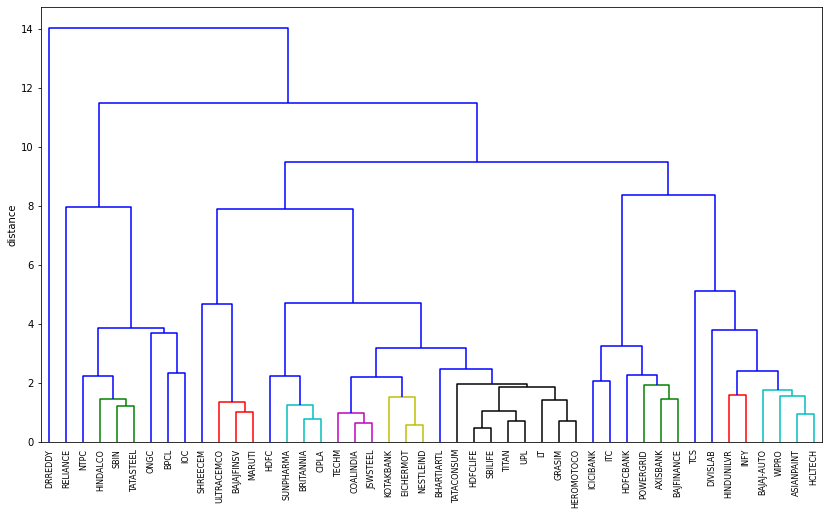

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

#### **Interpreting the Dendrogram**
- Note that we are now plotting companies that are similar to one another.
- The leaves of the tree correspond to the records.
- The length of the branch in the tree indicates the degree of dissimilarity between corresponding clusters.

#### **Insights**
- Technical stocks like WIPRO, TECH MAHINDRA, ITC, HCLTECH and TATASTEEL are all clustered together as they move together.
- Banks like KOTAKBANK, HDFCBANK AND HDFCLIFE are moving together.
- Pharmaceutical companys like SUNPHARMA, DR. REDDY, CIPLA, DIVISLAB show movement in their stocks together.
- Returns of ITC are quite dissimilar to TATACONSUMER.

### **Calculating the number of clusters**

Text(0, 0.5, 'distance')

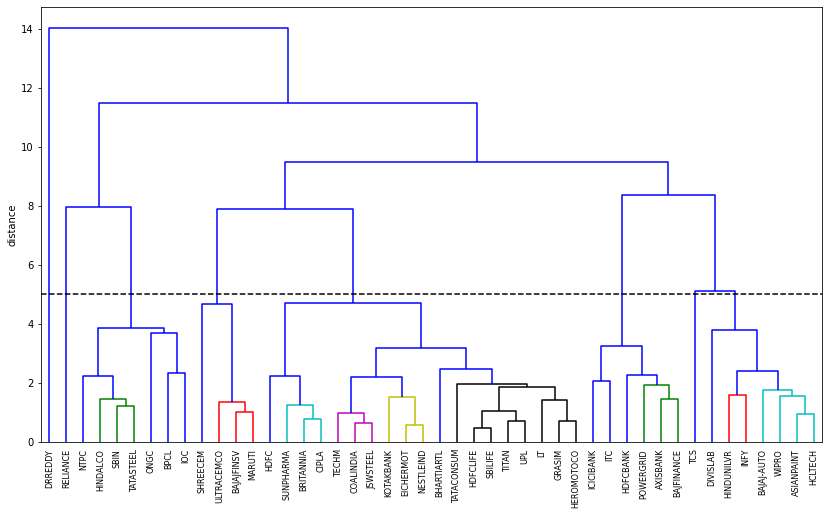

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=5, color='k', linestyle='--')
ax.set_ylabel('distance')

### **Performing Agglomerative Clustering with 5 clusters**

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

y_pred = hc_2020.fit_predict(scaled_df)

### **Plotting the characteristics of the learned clusters**

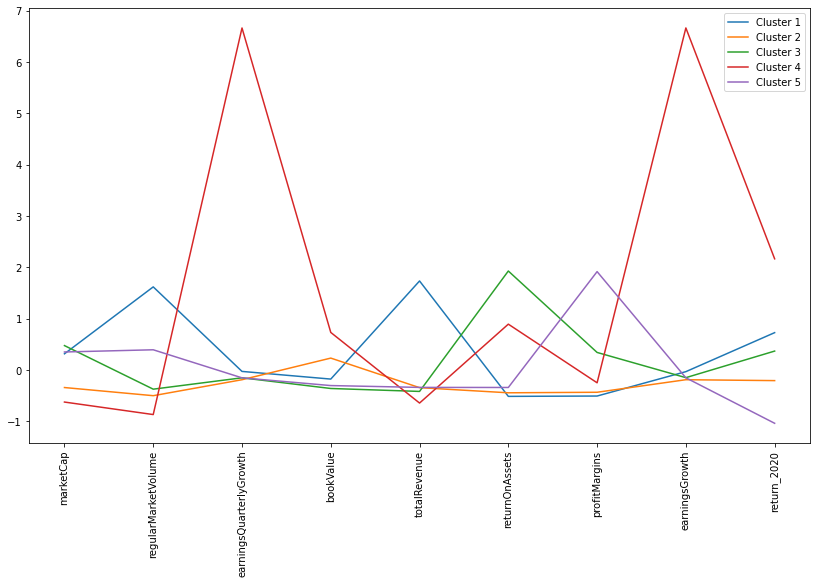

In [ ]:
#Plot a line graph to see the characteristics of the clusters
scaled_df['label'] = pd.Series(y_pred, index=scaled_df.index)

clustered_df = scaled_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)


#### **Looking at this, What characteristics do we find unique in each of these learned cluster?**

- **Cluster 1** - Bluechip stocks - high revenue companies with highest returns.
- **Cluster 2** - Smallcap stocks with fairly average returns.
- **Cluster 3** - Trader's favourites - high market volume with good profit margins.
- **Cluster 4** - Growth Portfolio - show high quarterly growth, and earnings growth in 2020.
- **Cluster 5** - Mid-to-large cap stocks with good returns and investment strategies.

This way, with the help of Hierarchical Clustering, we can draw conclusions on how different data points are grouped into different clusters, and also get information about the features of the dataset based on which the grouping is done.

***

## Gaussian Mixture Models: Introduction and Intuition

### **Introduction to Gaussian Mixture Models**

#### **Let's start with a simple example**

Imagine we have some data points (values) corresponding to just 1 feature (1-D data).

<img src='https://drive.google.com/uc?id=1XrboTn33q9Wf-LTi64oYhz661XNKJOUv' width='500'>


#### **What sort of distribution do you think we can fit on this data?**

- There are a lot of data points in the centre and as we go away from centre, the number of data points become lesser and lesser.

- **Normal Distribution**

<img src='https://drive.google.com/uc?id=1pVcck1c3rrgLuAV0dn16OpMSoPdqvBrV'>

- This is known as **1-Dimensional Gaussian Distribution**.

- It's the Gaussian Distribution for only 1 feature.

- It's a **Unimodal** data - because there's only 1 peak in the data.


Now, Imagine we have data points corresponding to same 1 feature, but distributed like this:

<img src='https://drive.google.com/uc?id=1z2Be83KTl29C2_aQKEDtq2b5bP4vJtbE' width='500'>

#### **Now, What sort of distribution we can fit on this data?**

<img src='https://drive.google.com/uc?id=1s2pak5GS7n23Ik1ofu4bH8YksR_j5l0k'>

- It consists of 2 Gaussian Distributions

- Two peaks in the data - Two means

- Such data where there are 2 or more peaks is called **Multi-Modal** data.

The final distribution would look something like this:

<img src='https://drive.google.com/uc?id=1_f8vUPJ3RbeEW5oo10sqgJZIO-y_EXlg'>

- This is known as a **Mixture of Gaussians**.








#### **Let's say we have a Mixture of Gaussians**

- Where $\mu_1$ and $\sigma_1$ are the Mean and Standard Deviation of first Gaussian and $\mu_2$ and $\sigma_2$ are the Mean and Standard Deviation of second Gaussian.

<img src='https://drive.google.com/uc?id=1v3Z2ljvkagkBaace_LXzDBiYwYvj-Wem'>

- Let's take a point $x_i$ corresponding to the feature.

- This point $x_i$ could belong to either Gaussian 1 ($G_1$) or Gaussian 2 ($G_2$).

- Ideally, it can belong to only one **Gaussian (Cluster)**.

- However, practically speaking, there is a certain probability of $x_i$ belonging to $G_1$ and $G_2$

- For example, as shown in picture, the probability of point $x_1$ belonging to $G_1$ is 0.1 and the probability of point $x_1$ belonging to $G_2$ is 0.9.

- There is a non-zero probability of a point belonging to each of the Gaussians.

- As an another example, take a point $x_2$ as shown in figure whose probablity of belonging to $G_1$ or Cluster $C_1$ is very high (0.99) compared to its probablity of belonging to $G_2$ or Cluster $C_2$ (0.01).






### **Intuition behind Gaussian Mixture Model**

- The basic intuition behind Gaussian Mixture Model is that **we can model any data, that we have, as a mixture of Gaussians**.

Let's take 1-Dimensional data again, i.e., data points having only 1 feature

- This time let's say that data points are distributed among **'k' Gaussians**, where each Gaussian has a different Mean ($\mu_k$) and Standard Deviation ($\sigma_k$), as shown below:

<img src='https://drive.google.com/uc?id=1_edDX751PQTqQgAEI7Krk44Su7dM7E_B'>

- Every data point $x_i$ will have a probabilty of belonging to each of the Gaussians, i.e.,
  
  $P(y_i = 1), P(y_i = 2), P(y_i = 3), ...$

  where, 1, 2, 3 ... are the indices of Clusters (Gaussians)

- The sum of these probabilities will be 1, i.e,

  $P(y_i = 1) + P(y_i = 2) + P(y_i = 3) + ... = 1$

- So, we are representing data as a combination of Gaussian distributions. Each data point belongs to each of the Gaussians with a non-zero probability, no matter how small that probability is.

- This is a 1-Dimensional Gaussian Mixture Model (GMM).


#### **So, there is a basic assumption of GMM**

- The data comes from multiple Gaussians, i.e., mixture of Gaussians.




### **Let's take the example of an E-Commerce Website**

- As we saw earlier, E-Commerce Websites do **Customer Segmentation** to increase their sales/revenue.

- Customers are clustered into different groups based on similar traits.

- It is possible that not all customers will solely belong to a single cluster.

<img src='https://drive.google.com/uc?id=1O8rdhmD19XWYmi0s7EAJb3JdA0ssptUg'>

- For example, a customer can be both wealthy and still be price-conscious. Let's say, he/she can fall in the "wealthy" cluster with a probability of 40%, but in the "price-concsious" cluster with a probability of 60%.

- So, we can create a Gaussian Mixture Model with such customers belonging to different clusters with different probabilities.

#### **An important thing to note is that each Gaussian Distribution in the mixture can have different spreads**

- That is, each Gaussian Distribution in the GMM can have different Mean and Standard Deviation.

- It is not necessary that all distributions in the Mixture Model will have to look same.

<img src='https://drive.google.com/uc?id=1H5vTItuesp33aa8Fsko_XpCo3yEJGewS'>






***

## Gaussian Mixture Model with Multiple Features

- So far we have seen GMMs with only 1 feature - **1-D Gaussian Mixture Models**


#### **What if our data has more than 2 features? How will our GMM look like then?**

- 2 features having continuous values can be thought of being on a plane with each data point as a point on the plane.

- The probability of a point belonging to each combination of those 2 continuous variables will come on the 3rd axis (z-axis).

<img src='https://drive.google.com/uc?id=1EauVjKF65LESE5U6nvbCEtGE9awdPyi3'>

- The Gaussian Distribution would look like a hill.

#### **Example Gaussian Distribution with 2 Features**

- Let's take the below Gaussian Distribution with 2 Features as an example:

<img src='https://drive.google.com/uc?id=1qtVESt1ZZSz58aywu-ExWJRN38J__acC'>

- As we can see, the data points are more dense in the centre and as we move away from the centre, the density of points decreases. This is to simulate a Gaussian (Normal) Distribution.

- If we consider only 1 feature at a time, we can see its Gaussian Distribution:
  - Red curve represents the Gaussian Distribution for Feature 1 alone.
  - Blue curve represents the Gaussian Distribution for Feature 2 alone.

- The Gaussian Distribution of the 2 features combined would look something like shown below:

  <img src='https://drive.google.com/uc?id=1DuCAoKI5tVjXgqLz3M9EN8Tvp5CoWEtX'>

- This is a 2-D Gaussian where the peak is in 3-D.

#### For a **D-dimensional or Multivariate data, the Gaussian Distribution will be in D+1 dimensions**.





***

## Mathematical Formulation of Gaussian Distribution

- A **1-D (having only 1 feature) Gaussian Distribution** can be represented as:

  $N(\mu, \sigma)$

  where, $\mu$ is the mean and $\sigma$ is the Standard Deviation of the Gaussian Distribution

- A **2-D (having 2 features) Gaussian Distribution** can be represented as:

  $N_2(\mu^{(2)}, \sum^{(2 \times 2)})$

  Now here,
  
  $\mu^{(2)}$ is not just a mean, it is a **vector of means $[\mu_1, \mu_2]$**, where $\mu_1$ and $\mu_2$ are the means of features $f_1$ and $f_2$

  And, $\sum^{(2 \times 2)}$ is the **$2 \times 2$ Covariance Matrix** of the whole data.

<img src='https://drive.google.com/uc?id=1lB7ZfcOw-bMsUF1GNCigjh0cJYZSa7XN'>

- Mean ($\mu$) and Standard Deviation ($\sigma$) of 1-D Gaussian Distribution are scaler values, whereas for 2-D Gaussian Distribution, we have a vector of Means (**$\mu^{(2)}$**) and a $2 \times 2$ Covariance Matrix ($\sum^{(2 \times 2)}$).

#### **Now, What about a d-Dimensional Gaussian Distribution?**

- A **d-Dimensional Gaussian Distribution** can be represented as:

  $N_d(\mu^{(d)}, \sum^{(d \times d)})$

  Here, $\mu^{(d)}$ is a d-Dimensional vector of means of all d-features, i.e., $[\mu_1, \mu_2, \mu_3, ... \mu_d]$
  And $\sum^{(d \times d)}$ here is a $d \times d$ Covariance Matrix of the data.

- So, a high dimensional Gaussian Distribution can be mathematically represented in terms of Vector of Means and Covariance Matrix of the data.









### **A Refresher on Covariance Matrix**

- Covariance Matrix represents the correlation b/w features of the data.

- The diagonal elements are the Standard Deviations of each feature, which signify the spread of data in each individual feature.

- The non-diagonal elements represent the correlation b/w each pair of features.

<img src='https://drive.google.com/uc?id=1_pWZ5ChUyh_vXEMluVLKSOrIhsL5yHrG'>

- A non-diagonal element will be **close to zero** if no correlation exists b/w data features.

- A non-diagonal element will be **+ve** if there is a +ve correlation b/w the two features, i.e., value of feature 2 increases when value of feature 1 increases and value of feature 2 decreases when value of feature 1 decreases.

- A non-diagonal element will be **-ve** if there is a -ve correlation b/w the two features, i.e., value of feature 2 decreases when value of feature 1 increases and value of feature 2 increases when value of feature 1 decreases.

<img src='https://drive.google.com/uc?id=1RdJHwWgnt7HwCcX8WXklNhUYiR7cyIQq'>

- So, Covariance Matrix captures how the data is spread, not just along a particular feature (or axis), but how it is spread overall.

- It captures the correlations b/w each pair of features.







***

## Multi-Dimensional Multi-Modal Gaussian Distributions (Mixture Models)

- So far, we studied only Multi-Dimensional Data with a single Gaussian Distribution, i.e., there was only 1 peak (hill) in the data.

- Now, Let's extend this concept to a **Mixture of Gaussian Distributions in Multi-Dimensional Data**.

- Here's an example of a **2-Dimensional 3-Gaussian Distributions**:

<img src='https://drive.google.com/uc?id=1aisHCDizRBId_4dcp5XvVXuYJBpXE4oc'>

- If we look at it, the data points are concentrated at 3 different locations in the 2-D plane. Therefore, the data will have 3 peaks with different distributions → 3 Gaussian Distributions.

#### **Now, What if we want to model a d-Dimensional 3-Gaussian Mixture Model?**

- In order to represent a d-Dimensional data, i.e., data having d-features, as a 3-Gaussian Mixture Model, we'll need to find all 3 Gaussian Distributions.

- And to find all 3 Gaussian Distributions, for each Gaussian Distribution, we'll need to find:

  - The d-Dimensional vector of means $\mu^{(d)}$

  - The $d \times d$ Covariance Matrix $\sum^{(d \times d)}$

- Each of the 3 Gaussians will have these as its parameters.

<img src='https://drive.google.com/uc?id=1PAYppAqIm_VCAdVvmieVWFoyuFaDFPuE'>

#### **Now Let's go through it step-by-step**

**For 1-D 3-Gaussian Mixture Model**, we'll need:
- Mean ($\mu$) of all 3 Gaussian Distributions.

- Standard Deviation ($\sigma$) of all 3 Gaussian Distributions.

<img src='https://drive.google.com/uc?id=1FoeOShoSMupvGRGYbXNDdIIY_rZqX3Cj'>

- Given this information, we can find the probability of any data point $x_i$ belonging to all the 3 Gaussians

- That is, $P(x_i | G_1), P(x_i | G_2), P(x_i | G_3)$

- We can just plug the data point $x_i$ in **Probability Density Function (PDF)** and compute the probability of the data point belonging to each Gaussian.

- The Probability Density Function gives the distribution of probabilities of data points belonging to each of the Gaussians.

<img src='https://drive.google.com/uc?id=1Ybo14NBY37gVcjjPRSNrK8psHknat8PS'>

Now similarly, **For a d-Dimensional Gaussian Mixture Model**, we'll need:

- The d-dimensional vector of means $\mu^{(d)}$ and the $d \times d$ Covariance Matrix $\sum^{(d \times d)}$, i.e., the Normal Distribution $N_d$.

- If we have this Normal Distribution $N_d$, we can compute the probability of a data point belonging to a Gaussian (Cluster) using a slightly more complex density function:

<img src='https://drive.google.com/uc?id=1KptkC_3UwxZDA3OLS0bEgMgbO81IiyEf'>

- This is the **Probability Density of the d-Dimensional vector**.

(The mathematical derivation of this formula is beyond the scope of this lecture)

***

## Finding K-Gaussians

#### **Now eventually what we need to find is those K-Gaussians (Clusters)**

- That is, Given a d-Dimensional data,

  For every K, we need to compute the d-dimensional vector of means $\mu^{(d)}$ and the $d \times d$ Covariance Matrix $\sum^{(d \times d)}$

- We need to identify those K-Gaussian Distributions → Develop a Gaussian Mixture Model from the given data.

<img src='https://drive.google.com/uc?id=1RCVztWKltQx1OXUzjLQ644oSdCgXFg8n'>

- This problem of finding K-Gaussians is an **optimization problem**.

- We will solve this optimization problem using a technique called **Expectation Maximization**.

- This is a **probabilistic way of creating clusters**.




***

## Closing Notes

- In the next lecture, we'll solve the problem of finding K-Gaussians as an optimization problem, and see how we can create a Gaussian Mixture Model from a given data.

- We'll make use of an interesting technique Expectation Maximization, which is a Coordinated Ascent to solve this optimization problem.

- We'll also cover some miscellaneous topics after GMM.

